- unfreeze all bn 1 epoch then freeze
- diff lr per layer
- TTA
- 2x2 avg pool?

## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

from sklearn.metrics import fbeta_score

In [2]:
def f2(preds, targs):
    return max([fbeta_score(targs, (preds>th), 2, average='samples') 
                for th in [0.17,0.18,0.19,0.20,0.21,0.22,0.23]])

In [3]:
bs=48; sz=64; metrics=[f2]
f_model = resnet50
path = "/data/jhoward/fast/planet/"

## Train

In [4]:
n=len(list(open(f'{path}train_v2.csv')))-1
val_pct=0.2
np.random.seed(42)
val_idxs=np.random.permutation(n)[:int(val_pct*n)]

In [5]:
transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//10)

In [6]:
data_full = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [7]:
data = data_full.resize(128, 'tmp') if sz<=128 else data_full

In [11]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, xtra_cut=1,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [9]:
lrf=learn.lr_find(True)

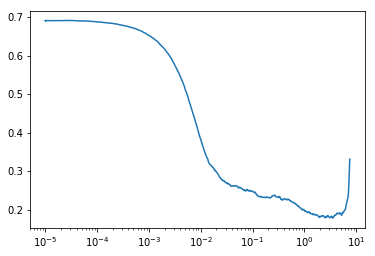

In [10]:
lrf.plot()

In [12]:
learn.fit(2, 0.6, cycle_len=1)

[0.13599747463908582, 0.13107783, 0.88261086]


[0.12460708726432719, 0.12030169, 0.89599168]



In [13]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(2, 0.15*(i-3), cycle_len=1)

[0.10358274217286509, 0.10179605, 0.91590595]


[0.10308412779391897, 0.097812556, 0.91773003]



[0.10002162049989358, 0.096763119, 0.92047966]


[0.10295246379957328, 0.095109627, 0.92117327]



[0.095507326638491, 0.093835622, 0.92242557]


[0.10277513890363008, 0.093631595, 0.92230767]



In [14]:
learn.unfreeze()

In [15]:
learn.fit(1, 0.2, cycle_len=1)

[0.10224657759387534, 0.094567433, 0.9208644]



In [16]:
learn.fit(1, 1e-2, cycle_len=1)

[0.09709293075073883, 0.093804002, 0.92207271]



In [17]:
learn.fit(20, 0.2, cycle_len=5)

[0.10560762292249323, 0.10334273, 0.91357708]


[0.10223249184773782, 0.10014981, 0.91671908]


[0.09438160374555268, 0.097534925, 0.9157846]


[0.09594166869731355, 0.091994673, 0.92306411]


[0.09479673862852328, 0.091263928, 0.92382687]


[0.10323021903719688, 0.10034195, 0.9155063]


[0.09992542818937025, 0.096292973, 0.91968262]


[0.09456487286113602, 0.093608752, 0.92250091]


[0.09050068655488223, 0.090795442, 0.92430151]


[0.0865963552946252, 0.090556517, 0.9242512]


[0.10622169938968412, 0.098400854, 0.91783267]


[0.09875583800347425, 0.096975408, 0.92191535]


[0.08986581422683187, 0.093576036, 0.920443]


[0.09002429395902731, 0.090092674, 0.92540872]


[0.08655415024985776, 0.089767575, 0.92608166]


[0.0997390371762862, 0.096568488, 0.92025304]


[0.09823551505162897, 0.096255571, 0.91770607]


[0.0919653972761051, 0.092765331, 0.92330474]


[0.08419343683665537, 0.090438902, 0.92448759]


[0.08360405483668264, 0.089834988, 0.9262166]



In [18]:
learn.save('rn50-64')

In [7]:
tfms = ClassifierData.tfms_from_model(f_model, 128, aug_tfms=transforms_pt, pad=sz//10)

In [8]:
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [9]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, xtra_cut=1,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [10]:
learn.load('rn50-64')

In [11]:
learn.fit(2, 0.6, cycle_len=1)

[0.09609400160135279, 0.091422409, 0.92417681]


[0.08747616543530462, 0.088762686, 0.92722011]



In [12]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(1, 0.15*(i-3), cycle_len=1)

[0.09434392622328347, 0.085849449, 0.9299767]



[0.09333500460534663, 0.08536353, 0.93036115]



[0.09014199148104383, 0.084655233, 0.93042779]



In [13]:
learn.unfreeze()

In [14]:
learn.fit(1, 0.2, cycle_len=1)

[0.09207966310825855, 0.085103534, 0.93066984]



In [31]:
learn.fit(6, 0.2, cycle_len=3)

[0.08878902684068218, 0.088391967, 0.92588812]


[0.08537326016781738, 0.085220806, 0.92867064]


[0.08438509171129702, 0.084030949, 0.93115401]


[0.09060398879246573, 0.087937735, 0.92560738]


[0.08513518906002836, 0.084603518, 0.92952549]


[0.08253142654417292, 0.083666429, 0.9308309]


In [15]:
learn.fit(6, 0.2, cycle_len=3)

[0.09329965938980399, 0.091106266, 0.92632949]


[0.08746363568704482, 0.084229112, 0.9312681]


[0.08586479033689581, 0.083388895, 0.93140823]


[0.09332439954447995, 0.088527493, 0.92629933]


[0.08709938129152463, 0.084324583, 0.93107378]


[0.08840324434960643, 0.083076909, 0.93197966]



In [16]:
learn.save('128')

In [7]:
tfms = ClassifierData.tfms_from_model(f_model, 256, aug_tfms=transforms_pt, pad=sz//10)
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [8]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, xtra_cut=1,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [9]:
learn.load('128')

In [10]:
learn.fit(2, 0.6, cycle_len=1)

[0.10485960085818175, 0.09151195, 0.92505026]


[0.09612525037075413, 0.088392437, 0.92789608]



In [11]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(1, 0.15*(i-3), cycle_len=1)

[0.0951074985514665, 0.08485163, 0.93084055]



[0.09290978817085885, 0.084411711, 0.93176448]



[0.09504217152124093, 0.083665118, 0.93226278]



In [12]:
learn.unfreeze()

In [13]:
learn.fit(1, 0.2, cycle_len=1)

[0.08842272024116438, 0.08382684, 0.93176299]



In [14]:
learn.fit(6, 0.2, cycle_len=3)

[0.09592530084610774, 0.087744102, 0.92646003]


[0.09051119499645437, 0.083441257, 0.93179721]


[0.08735657924386434, 0.082302645, 0.93239903]


[0.0948946054715035, 0.086424097, 0.92857164]


[0.08738537949816365, 0.083536319, 0.93188339]


[0.08272037644209755, 0.081846915, 0.93261284]



In [15]:
learn.fit(8, 0.2, cycle_len=4)

[0.0919629409827492, 0.088549711, 0.92689615]


[0.08626610236190767, 0.085533693, 0.928581]


[0.08253270481600922, 0.082930766, 0.9315899]


[0.08241787380401544, 0.08186999, 0.93222028]


[0.09257557010087493, 0.090446077, 0.92898846]


[0.0872454547244511, 0.083380304, 0.9307968]


[0.0835098829537015, 0.082294166, 0.93263173]


[0.0801816913241908, 0.081689738, 0.93307865]



In [16]:
learn.save('256')

In [17]:
learn.fit(8, 0.1, cycle_len=4)

[0.08526436175567553, 0.082868934, 0.93250477]


[0.08273540837176668, 0.0834454, 0.93215364]


[0.07847252532643169, 0.081374608, 0.93328488]


[0.08051727311268717, 0.081306547, 0.93300545]


[0.08290744381910896, 0.083021492, 0.93188]


[0.07808371493002628, 0.082438298, 0.93187577]


[0.07914520780402222, 0.081531055, 0.93262845]


[0.07182454563378607, 0.081189938, 0.93297923]



### Import data

In [15]:
tfm=image_gen(noop, 64, pad=6)
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, [1,2,3], (tfm,tfm),
               suffix='.jpg')

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
x,y=next(iter(ds.val_dl))
im=x[0].numpy()
plt.imshow(im)

In [ ]:
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

In [ ]:
PIL.Image.open(ds.val_dl.dataset.fnames[0])